<a href="https://colab.research.google.com/github/Rahul-dsml/Myprojects/blob/main/CIFAR_10_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization

In [2]:
#Load the dataset
(X_train, y_train), (X_test, y_test)= cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


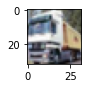

In [5]:
plt.figure(figsize=(1,1))
plt.imshow(X_train[1])
plt.show()

In [6]:
y_train[1]

array([9], dtype=uint8)

In [7]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
# Converting the datatype from int to float
X_train.dtype

dtype('uint8')

In [9]:
X_train= X_train.astype('float32')
X_test= X_test.astype('float32')

In [10]:
#Normalizing the values
X_train= X_train/255
X_test= X_test/255

In [11]:
y_train= tf.keras.utils.to_categorical(y_train, 10)
y_test= tf.keras.utils.to_categorical(y_test, 10)

In [13]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

### Model Building

In [35]:
Batch_size= 64
img_ht= 32
img_wd= 32
num_classes= 10

In [31]:
model= Sequential([
                   layers.Conv2D(32, kernel_size=(3,3),padding='same', input_shape= (img_ht, img_wd, 3), activation= 'relu'),
                   layers.Conv2D(32, kernel_size= (3,3), activation='relu'),
                   layers.BatchNormalization(),
                   layers.MaxPool2D(pool_size=(2,2)),
                   layers.Dropout(0.25),
                   layers.Conv2D(64, kernel_size= (3,3), padding= 'same',activation='relu'),
                   layers.Conv2D(64, kernel_size= (3,3), activation='relu'),
                   layers.BatchNormalization(),
                   layers.MaxPool2D(pool_size=(2,2)),
                   layers.Dropout(0.25),
                   layers.Conv2D(128, kernel_size= (3,3), padding= 'same',activation='relu'),
                   layers.Conv2D(128, kernel_size= (3,3), activation='relu'),
                   layers.BatchNormalization(),
                   layers.MaxPool2D(pool_size=(2,2)),
                   layers.Dropout(0.25),
                   layers.Flatten(),
                   layers.Dense(256, activation='relu'),
                   layers.Dense(512, activation= 'relu'),
                   layers.Dropout(0.5),
                   layers.Dense(num_classes, activation= 'softmax')
])

In [32]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_23 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_11 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_24 (Conv2D)          (None, 15, 15, 64)       

In [33]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              metrics= ['accuracy'],
              loss= tf.keras.losses.categorical_crossentropy)

In [36]:
epochs=50
history= model.fit(X_train,
                   y_train,
                   batch_size= Batch_size,
                   epochs= epochs,
                   verbose=1,
                   validation_data= (X_test, y_test))

Epoch 1/50
782/782 [==============================] - 17s 21ms/step - loss: 1.0241 - accuracy: 0.6437 - val_loss: 0.9262 - val_accuracy: 0.6798
Epoch 2/50
782/782 [==============================] - 17s 22ms/step - loss: 0.8632 - accuracy: 0.7024 - val_loss: 0.9070 - val_accuracy: 0.6882
Epoch 3/50
782/782 [==============================] - 17s 21ms/step - loss: 0.7774 - accuracy: 0.7342 - val_loss: 0.8863 - val_accuracy: 0.7076
Epoch 4/50
782/782 [==============================] - 16s 21ms/step - loss: 0.7116 - accuracy: 0.7552 - val_loss: 0.8071 - val_accuracy: 0.7328
Epoch 5/50
782/782 [==============================] - 16s 21ms/step - loss: 0.6586 - accuracy: 0.7736 - val_loss: 0.6873 - val_accuracy: 0.7690
Epoch 6/50
782/782 [==============================] - 16s 21ms/step - loss: 0.6229 - accuracy: 0.7874 - val_loss: 0.6819 - val_accuracy: 0.7717
Epoch 7/50
782/782 [==============================] - 16s 21ms/step - loss: 0.5861 - accuracy: 0.7988 - val_loss: 0.6400 - val_accuracy:

The model is good with training accuracy of 93.7 % and validation accuracy of 84.3 %.

In [37]:
import pickle
pickle.dump(model, open('cifar10_cnn.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://7bb285e3-42ca-48fe-b78c-e03117c4c0d3/assets


In [38]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.6079 - accuracy: 0.8435


[0.6079328060150146, 0.843500018119812]